## Import all packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
from datetime import date
import math
import random
import swifter

## Import data sets

In [4]:
#read in the data

chi_data = pd.read_csv("chicago_2017.csv")
chi_weather = pd.read_csv("weather_hourly_chicago.csv")

## General information about the raw data

### chicago_2017 data set

In [ ]:
#chi_data.info()

In [ ]:
#chi_data.describe()

In [ ]:
#chi_data.head()

### weather_hourly_chicago data set

In [ ]:
#chi_weather.info()

In [ ]:
#chi_weather.describe()

In [ ]:
#chi_data.head()

# Data collection and preparation

---> JONA HIER EINFÜGEN

In [6]:
chi_trips_Q1 = pd.read_csv('Divvy_Trips_2017_Q1.csv')
chi_trips_Q2 = pd.read_csv('Divvy_Trips_2017_Q2.csv')
chi_trips_Q3 = pd.read_csv('Divvy_Trips_2017_Q3.csv')
chi_trips_Q4 = pd.read_csv('Divvy_Trips_2017_Q4.csv')

#Trip Data

In [7]:
chi_trips_Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431691 entries, 0 to 431690
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            431691 non-null  int64  
 1   start_time         431691 non-null  object 
 2   end_time           431691 non-null  object 
 3   bikeid             431691 non-null  int64  
 4   tripduration       431691 non-null  int64  
 5   from_station_id    431691 non-null  int64  
 6   from_station_name  431691 non-null  object 
 7   to_station_id      431691 non-null  int64  
 8   to_station_name    431691 non-null  object 
 9   usertype           431691 non-null  object 
 10  gender             390312 non-null  object 
 11  birthyear          390394 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 39.5+ MB


In [8]:
chi_trips_Q1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0


In [9]:
chi_trips_Q4.tail() 

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
669234,16734070,10/1/2017 0:01,10/1/2017 0:15,1099,837,289,Wells St & Concord Ln,226,Racine Ave & Belmont Ave,Subscriber,Male,1991.0
669235,16734069,10/1/2017 0:00,10/1/2017 0:07,3688,366,45,Michigan Ave & Congress Pkwy,52,Michigan Ave & Lake St,Customer,NaN,NaN
669236,16734068,10/1/2017 0:00,10/1/2017 0:05,1416,264,520,Greenview Ave & Jarvis Ave,447,Glenwood Ave & Morse Ave,Customer,NaN,NaN
669237,16734067,10/1/2017 0:00,10/1/2017 0:06,5396,361,288,Larrabee St & Armitage Ave,289,Wells St & Concord Ln,Subscriber,Female,1984.0
669238,16734066,10/1/2017 0:00,10/1/2017 0:12,5802,741,135,Halsted St & 21st St,129,Blue Island Ave & 18th St,Subscriber,Female,1994.0


In [10]:
chi_trips_Q1['start_time'] = pd.to_datetime(chi_trips_Q1.start_time)
chi_trips_Q2['start_time'] = pd.to_datetime(chi_trips_Q2.start_time)
chi_trips_Q3['start_time'] = pd.to_datetime(chi_trips_Q3.start_time)
chi_trips_Q4['start_time'] = pd.to_datetime(chi_trips_Q4.start_time)


In [11]:
chi_trips_Q1['end_time'] =  pd.to_datetime(chi_trips_Q1.end_time)
chi_trips_Q2['end_time'] =  pd.to_datetime(chi_trips_Q2.end_time)
chi_trips_Q3['end_time'] =  pd.to_datetime(chi_trips_Q3.end_time)
chi_trips_Q4['end_time'] =  pd.to_datetime(chi_trips_Q4.end_time)

In [12]:
chi_trips_Q1.sort_values(by= 'start_time', inplace = True)
chi_trips_Q2.sort_values(by= 'start_time', inplace = True)
chi_trips_Q3.sort_values(by= 'start_time', inplace = True)
chi_trips_Q4.sort_values(by= 'start_time', inplace = True)

In [14]:
chi_trips_all= pd.concat([chi_trips_Q1, chi_trips_Q2, chi_trips_Q3, chi_trips_Q4], ignore_index = True) 
#joining Trip Data

In [16]:
chi_trips_all.tail(9)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
3829005,17536693,2017-12-31 23:17:00,2017-12-31 23:27:00,2471,615,49,Dearborn St & Monroe St,26,McClurg Ct & Illinois St,Subscriber,Male,1981.0
3829006,17536694,2017-12-31 23:21:00,2017-12-31 23:23:00,2562,141,226,Racine Ave & Belmont Ave,117,Wilton Ave & Belmont Ave,Subscriber,Male,1987.0
3829007,17536695,2017-12-31 23:34:00,2017-12-31 23:39:00,6351,301,337,Clark St & Chicago Ave,182,Wells St & Elm St,Subscriber,Male,1990.0
3829008,17536696,2017-12-31 23:41:00,2017-12-31 23:51:00,5840,589,93,Sheffield Ave & Willow St,343,Racine Ave & Wrightwood Ave,Subscriber,Male,1988.0
3829009,17536697,2017-12-31 23:42:00,2017-12-31 23:47:00,5353,272,240,Sheridan Rd & Irving Park Rd,245,Clarendon Ave & Junior Ter,Subscriber,Male,1977.0
3829010,17536698,2017-12-31 23:48:00,2017-12-31 23:53:00,5667,315,340,Clark St & Wrightwood Ave,143,Sedgwick St & Webster Ave,Subscriber,Male,1963.0
3829011,17536699,2017-12-31 23:54:00,2018-01-01 00:18:00,4906,1441,145,Mies van der Rohe Way & Chestnut St,145,Mies van der Rohe Way & Chestnut St,Customer,NaN,NaN
3829012,17536700,2017-12-31 23:54:00,2018-01-01 00:18:00,5975,1402,145,Mies van der Rohe Way & Chestnut St,145,Mies van der Rohe Way & Chestnut St,Customer,NaN,NaN
3829013,17536701,2017-12-31 23:58:00,2018-01-01 00:03:00,3304,284,159,Claremont Ave & Hirsch St,69,Damen Ave & Pierce Ave,Subscriber,Male,1988.0


In [17]:
chi_trips_all.nunique()
#comparing Trip-IDs with number of unique Trips

trip_id              3829003
start_time           2823388
end_time             2736001
bikeid                  6243
tripduration           16553
from_station_id          585
from_station_name        593
to_station_id            585
to_station_name          593
usertype                   3
gender                     2
birthyear                 87
dtype: int64

In [18]:
x = chi_trips_all.trip_id.value_counts()
x

13763843    2
13763403    2
13766552    2
13766560    2
13859842    2
           ..
13282310    1
17474567    1
13294600    1
17486857    1
16781310    1
Name: trip_id, Length: 3829003, dtype: int64

In [20]:
chi_trips_test = chi_trips_all[chi_trips_all.trip_id.isin(x.index[x.gt(1)])]

In [21]:
chi_trips_test

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
634989,13762609,2017-04-23 13:56:41,2017-04-23 14:28:04,3721,1883,267,Lake Park Ave & 47th St,4,Burnham Harbor,Customer,NaN,NaN
634990,13762609,2017-04-23 13:56:41,2017-04-23 14:28:04,3721,1883,267,Lake Park Ave & 47th St,4,Burnham Harbor,Customer,NaN,NaN
635000,13762620,2017-04-23 13:57:00,2017-04-23 14:27:30,4435,1830,267,Lake Park Ave & 47th St,4,Burnham Harbor,Customer,NaN,NaN
635001,13762620,2017-04-23 13:57:00,2017-04-23 14:27:30,4435,1830,267,Lake Park Ave & 47th St,4,Burnham Harbor,Customer,NaN,NaN
635686,13763383,2017-04-23 14:29:58,2017-04-23 14:47:19,5723,1041,4,Burnham Harbor,76,Lake Shore Dr & Monroe St,Customer,NaN,NaN
635687,13763383,2017-04-23 14:29:58,2017-04-23 14:47:19,5723,1041,4,Burnham Harbor,76,Lake Shore Dr & Monroe St,Customer,NaN,NaN
635703,13763403,2017-04-23 14:30:30,2017-04-23 14:47:13,3620,1003,4,Burnham Harbor,76,Lake Shore Dr & Monroe St,Customer,NaN,NaN
635705,13763403,2017-04-23 14:30:30,2017-04-23 14:47:13,3620,1003,4,Burnham Harbor,76,Lake Shore Dr & Monroe St,Customer,NaN,NaN
636121,13763843,2017-04-23 14:48:29,2017-04-23 15:12:41,3687,1452,76,Lake Shore Dr & Monroe St,99,Lake Shore Dr & Ohio St,Customer,NaN,NaN
636122,13763843,2017-04-23 14:48:29,2017-04-23 15:12:41,3687,1452,76,Lake Shore Dr & Monroe St,99,Lake Shore Dr & Ohio St,Customer,NaN,NaN


In [22]:
chi_trips_all.drop_duplicates(inplace=True, ignore_index=True) 
#deleting duplicate listed trips

In [23]:
chi_trips_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3829003 entries, 0 to 3829002
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   trip_id            int64         
 1   start_time         datetime64[ns]
 2   end_time           datetime64[ns]
 3   bikeid             int64         
 4   tripduration       int64         
 5   from_station_id    int64         
 6   from_station_name  object        
 7   to_station_id      int64         
 8   to_station_name    object        
 9   usertype           object        
 10  gender             object        
 11  birthyear          float64       
dtypes: datetime64[ns](2), float64(1), int64(5), object(4)
memory usage: 350.6+ MB


In [24]:
chi_trips_all['tripduration'].describe()

count    3.829003e+06
mean     9.556331e+02
std      1.569453e+03
min      6.000000e+01
25%      4.020000e+02
50%      6.860000e+02
75%      1.149000e+03
max      8.633800e+04
Name: tripduration, dtype: float64

In [25]:
chi_trips_all['tripduration'].value_counts()

332      4129
350      4091
372      4084
348      4082
327      4071
         ... 
52765       1
42512       1
17051       1
8848        1
9264        1
Name: tripduration, Length: 16553, dtype: int64

In [26]:
chi_trips_all.sort_values (by= 'tripduration')

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
2383744,15823245,2017-08-15 12:54:59,2017-08-15 12:55:59,6114,60,401,Shields Ave & 28th Pl,401,Shields Ave & 28th Pl,Subscriber,Female,1979.0
1604135,14913844,2017-07-03 16:23:33,2017-07-03 16:24:33,4372,60,118,Sedgwick St & North Ave,118,Sedgwick St & North Ave,Subscriber,Female,1962.0
104083,13116220,2017-01-30 11:58:04,2017-01-30 11:59:04,2040,60,208,Ashland Ave & 21st St,208,Ashland Ave & 21st St,Subscriber,Male,1949.0
2881553,16407630,2017-09-14 07:42:08,2017-09-14 07:43:08,1082,60,89,Financial Pl & Congress Pkwy,89,Financial Pl & Congress Pkwy,Subscriber,Male,1976.0
2395086,15836188,2017-08-15 20:53:25,2017-08-15 20:54:25,3128,60,172,Rush St & Cedar St,172,Rush St & Cedar St,Subscriber,Male,1973.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1542628,14843152,2017-06-30 14:32:51,2017-07-01 14:27:16,4914,86065,84,Milwaukee Ave & Grand Ave,508,Central Park Ave & North Ave,Customer,NaN,NaN
704264,13848225,2017-05-01 15:00:41,2017-05-02 14:55:37,1146,86096,328,Ellis Ave & 58th St,420,Ellis Ave & 55th St,Subscriber,Male,1986.0
1106068,14334127,2017-06-04 13:07:01,2017-06-05 13:04:05,735,86224,438,Central Park Ave & Ogden Ave,438,Central Park Ave & Ogden Ave,Customer,NaN,NaN
410498,13492809,2017-03-27 20:09:57,2017-03-28 20:07:30,4563,86253,31,Franklin St & Chicago Ave,46,Wells St & Walton St,Customer,NaN,NaN


In [27]:
chi_trips_60sec=chi_trips_all[chi_trips_all.tripduration == 60]
chi_trips_60sec.count()

#checking quantity of very short trips

trip_id              312
start_time           312
end_time             312
bikeid               312
tripduration         312
from_station_id      312
from_station_name    312
to_station_id        312
to_station_name      312
usertype             312
gender               225
birthyear            231
dtype: int64

In [28]:
chi_trips_all_idcheck = chi_trips_all[['from_station_id', 'from_station_name']]

In [29]:
grouped_chi_trips_all = chi_trips_all_idcheck.groupby(['from_station_id'])
grouped_chi_trips_all = grouped_chi_trips_all.agg({"from_station_name": "nunique"})

grouped_chi_trips_all = grouped_chi_trips_all. reset_index()

print(grouped_chi_trips_all)

     from_station_id  from_station_name
0                  2                  1
1                  3                  1
2                  4                  1
3                  5                  1
4                  6                  1
..               ...                ...
580              622                  1
581              623                  1
582              624                  1
583              625                  1
584              626                  1

[585 rows x 2 columns]


In [30]:
bad_ids = grouped_chi_trips_all[grouped_chi_trips_all['from_station_name']>1]

#listing IDs that are associated with multiple names

In [31]:
bad_ids

,from_station_id,from_station_name
13,17,2
49,53,2
67,75,2
298,321,2
401,437,2
443,480,2
503,544,2
533,574,2


In [33]:
chi_trips_all.to_csv('cleanedtrips.csv')

## Add date time features to chi_data

In [5]:
chi_data['start_time']= pd.to_datetime(chi_data['start_time'])

In [6]:
chi_data['end_time'] = pd.to_datetime(chi_data['end_time'])

In [7]:
chi_data.sort_values(['start_time'], inplace = True) #Sorts the values by date 

In [8]:
chi_data["Date"] = chi_data['start_time'].swifter.apply(lambda dt: dt.date())

In [9]:
chi_data["Month"] = chi_data['start_time'].swifter.apply(lambda dt: dt.month)

In [10]:
chi_data["Week"] = chi_data['start_time'].swifter.apply(lambda dt: dt.isocalendar()[1])

In [11]:
chi_data["Hour"] = chi_data['start_time'].swifter.apply(lambda dt: dt.hour)

In [12]:
chi_data["Weekday"] = chi_data['start_time'].swifter.apply(lambda dt: dt.weekday())

In [13]:
chi_data['Duration'] = (chi_data['end_time']-chi_data['start_time'])

In [14]:
chi_data["Duration_sec"] = chi_data["Duration"].swifter.apply(lambda x: x.total_seconds())

In [15]:
chi_data["IsWeekday"] = chi_data["Weekday"].swifter.apply(lambda x: 1 if x < 5 else 0)

In [ ]:
#chi_data.head()

## Add date weather features to chi_weather_2017

In [16]:
chi_weather['date_time']=pd.to_datetime(chi_weather['date_time'])

In [17]:
first_date = datetime(year=2017, day=1, month=1)
last_date = datetime(year=2017, day=31, month=12)
chi_weather_2017 = chi_weather[(chi_weather['date_time']>=first_date)&(chi_weather["date_time"] <= last_date)]

In [18]:
chi_weather_2017.sort_values(by = "date_time", inplace = True) #sort the values by date time

<ipython-input-18-dd50bfe8e1ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_weather_2017.sort_values(by = "date_time", inplace = True) #sort the values by date time


In [19]:
chi_weather_2017["Date"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.date())

<ipython-input-19-ff4fd3b3eea8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_weather_2017["Date"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.date())


In [20]:
chi_weather_2017['Month']= chi_weather_2017["date_time"].swifter.apply(lambda dt: dt.month)

<ipython-input-20-215697950b0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_weather_2017['Month']= chi_weather_2017["date_time"].swifter.apply(lambda dt: dt.month)


In [21]:
chi_weather_2017["Week"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.isocalendar()[1])

<ipython-input-21-c5b233e3b0fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_weather_2017["Week"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.isocalendar()[1])


In [22]:
chi_weather_2017["Hour"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.hour)

<ipython-input-22-414bd7212e72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_weather_2017["Hour"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.hour)


In [23]:
chi_weather_2017["Weekday"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.weekday())

<ipython-input-23-0c176fc0de61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_weather_2017["Weekday"] = chi_weather_2017['date_time'].swifter.apply(lambda dt: dt.weekday())


In [24]:
chi_weather_2017["mean_temp"] = (chi_weather_2017['max_temp']+chi_weather_2017['min_temp'])/2

<ipython-input-24-8167fca2a13d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_weather_2017["mean_temp"] = (chi_weather_2017['max_temp']+chi_weather_2017['min_temp'])/2


In [ ]:
#chi_weather_2017.head()

# Descriptive analystics

## Fleet size

In [ ]:
bikes = len(chi_data['bike_id'].unique())
print("The overall number of bikes is {}".format(bikes))

## Temporal demand patterns

### Bike rentals

#### Bike rentals per month

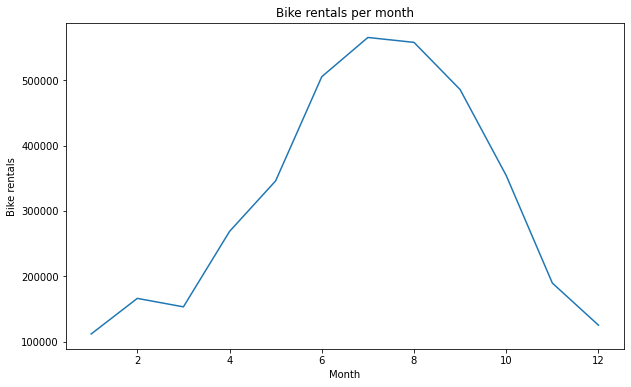

In [25]:
rentals_month = chi_data.groupby(['Month'])['bike_id'].count()
rentals_month = pd.DataFrame(rentals_month)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_month)
ax.set_title('Bike rentals per month')
ax.set_xlabel('Month')
ax.set_ylabel("Bike rentals")
plt.show()

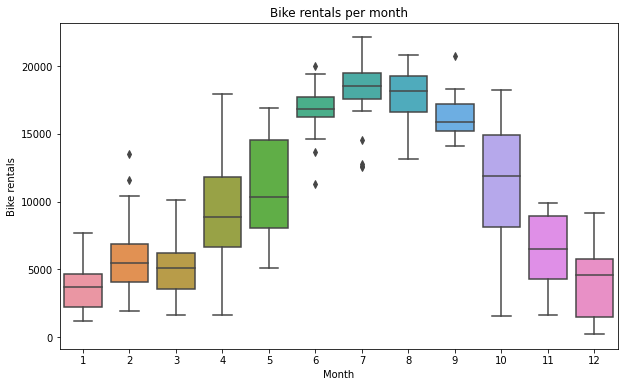

In [26]:
rentals_month_bp = chi_data.groupby(['Date','Month'])['bike_id'].count()
rentals_month_bp = pd.DataFrame(rentals_month_bp)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = rentals_month_bp.index.get_level_values('Month'), y =rentals_month_bp['bike_id'], ax = ax)
ax.set_title('Bike rentals per month')
ax.set_ylabel("Bike rentals")
plt.show()

#### Bike rentals per week

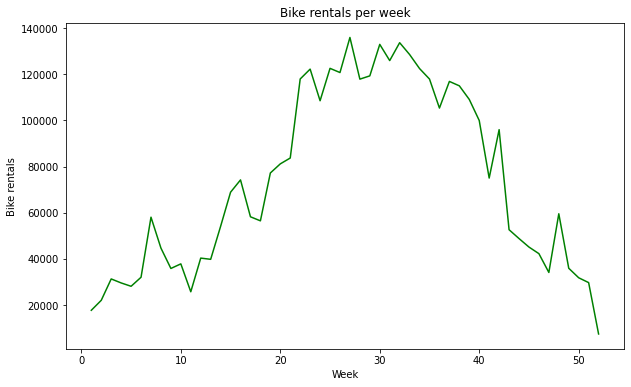

In [27]:
rentals_week = chi_data.groupby("Week")['bike_id'].count()
rentals_week = pd.DataFrame(rentals_week)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_week, c = "green")

ax.set_title('Bike rentals per week')
ax.set_ylabel("Bike rentals")
ax.set_xlabel("Week")
plt.show()

#### Bike rentals per weekday

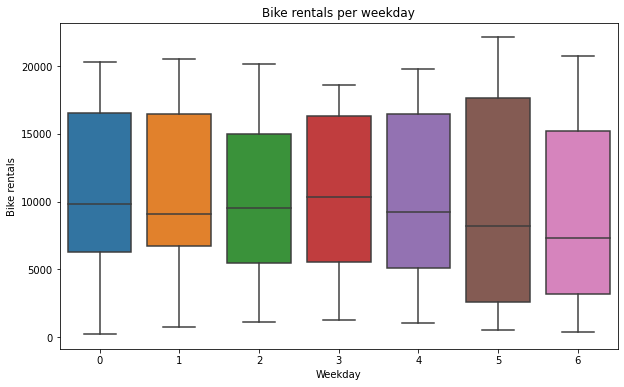

In [28]:
rentals_weekday = chi_data.groupby(['Weekday','Date'])['bike_id'].count()
rentals_weekday = pd.DataFrame(rentals_weekday)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = rentals_weekday.index.get_level_values('Weekday'), y =rentals_weekday['bike_id'], ax = ax)
ax.set_title('Bike rentals per weekday')
ax.set_ylabel("Bike rentals")

plt.show()

In [29]:
# legende Zahl - Wochentag

#### Bike rentals over year per day 

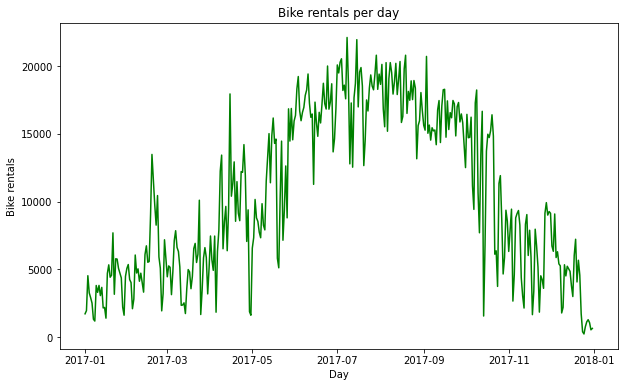

In [30]:
rentals_day = chi_data.groupby("Date")['bike_id'].count()
rentals_day = pd.DataFrame(rentals_day)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_day, c = "green")

ax.set_title('Bike rentals per day')
ax.set_ylabel("Bike rentals")
ax.set_xlabel("Day")
plt.show()

#### Bike rentals per hour

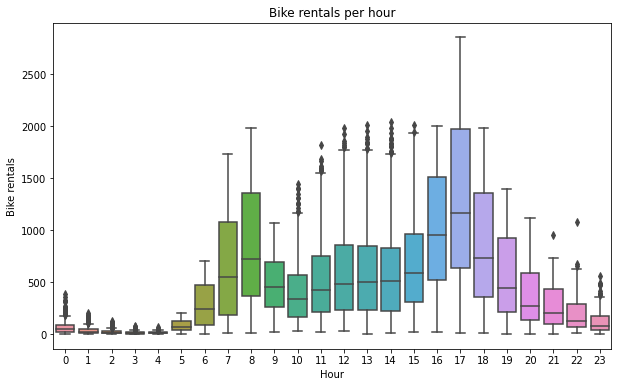

bike_id
Date       Hour         
2017-01-01 0          46
           1          46
           2          36
           3          18
           4           6
...                  ...
2017-12-31 19         20
           20         20
           21         13
           22          9
           23          9

[8743 rows x 1 columns]

In [69]:
rentals_hour = chi_data.groupby(["Date","Hour"])['bike_id'].count()
rentals_hour =pd.DataFrame(rentals_hour)

fig, ax = plt.subplots(figsize = (10,6))


sns.boxplot(x = rentals_hour.index.get_level_values("Hour"), y =rentals_hour['bike_id'], ax = ax)
ax.set_title('Bike rentals per hour')
ax.set_ylabel("Bike rentals")
plt.show()
rentals_hour

<function matplotlib.pyplot.show(close=None, block=None)>

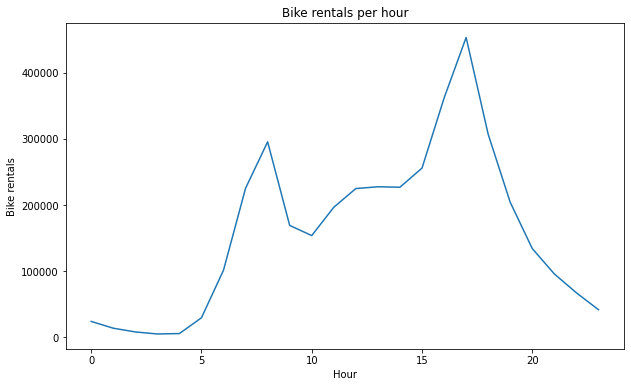

In [57]:
rentals_hour = chi_data.groupby(['Hour'])['bike_id'].count()
rentals_hour = pd.DataFrame(rentals_hour)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(rentals_hour)
ax.set_title('Bike rentals per hour')
ax.set_ylabel("Bike rentals")
ax.set_xlabel("Hour")
plt.show

#### Correlation between weekday, hour & rentals???

### Duration/Travel time

#### Duration per week

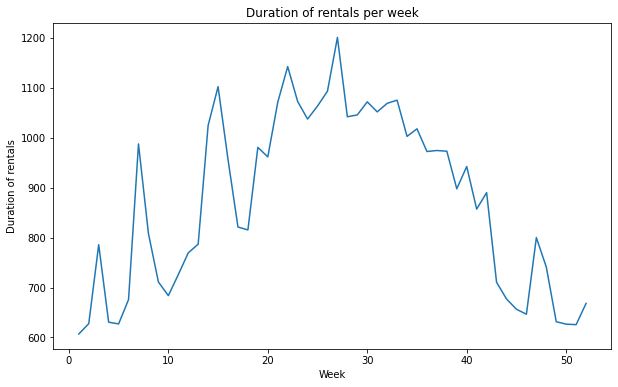

In [32]:
duration_week = chi_data.groupby("Week")["Duration_sec"].mean()
duration_week = pd.DataFrame(duration_week)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(duration_week)

ax.set_title('Duration of rentals per week')
ax.set_ylabel('Duration of rentals')
ax.set_xlabel('Week')
plt.show()

#### Duration per weekday

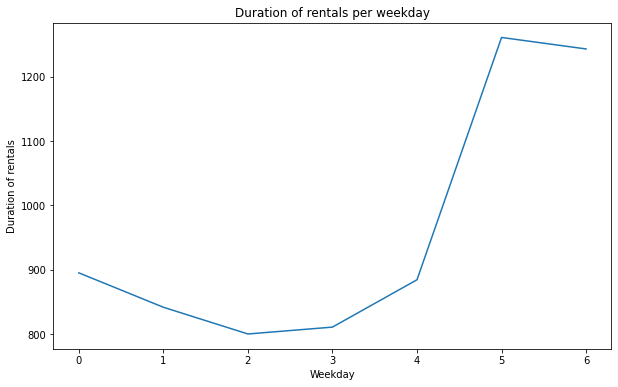

In [33]:
duration_weekday = chi_data.groupby("Weekday")["Duration_sec"].mean()
duration_weekday = pd.DataFrame(duration_weekday)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(duration_weekday)

ax.set_title('Duration of rentals per weekday')
ax.set_ylabel('Duration of rentals')
ax.set_xlabel('Weekday')
plt.show()

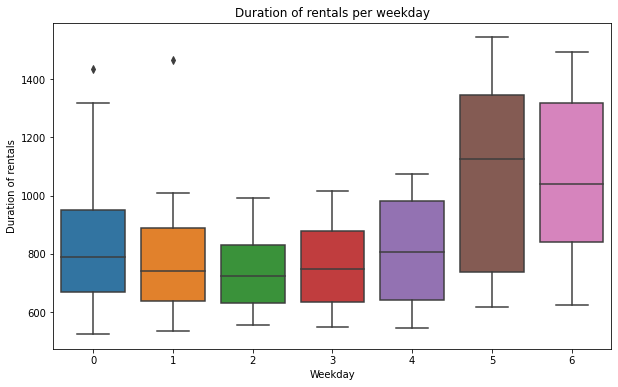

In [34]:
duration_weekday_bp = chi_data.groupby(["Date","Weekday"])['Duration_sec'].mean()
duration_weekday_bp =pd.DataFrame(duration_weekday_bp)

fig, ax = plt.subplots(figsize = (10,6))


sns.boxplot(x = duration_weekday_bp.index.get_level_values("Weekday"), y =duration_weekday_bp['Duration_sec'], ax = ax)
ax.set_title('Duration of rentals per weekday')
ax.set_ylabel('Duration of rentals')
plt.show()

#### Duration per hour

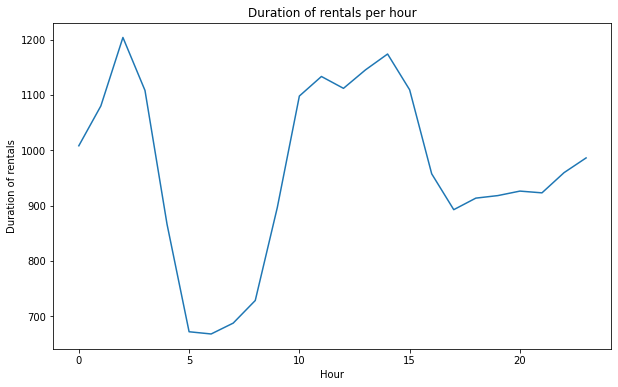

In [35]:
duration_hour = chi_data.groupby("Hour")["Duration_sec"].mean()
duration_hour = pd.DataFrame(duration_hour)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(duration_hour)

ax.set_title('Duration of rentals per hour')
ax.set_ylabel('Duration of rentals')
ax.set_xlabel('Hour')
plt.show()

### Weather

#### Temperature monthly

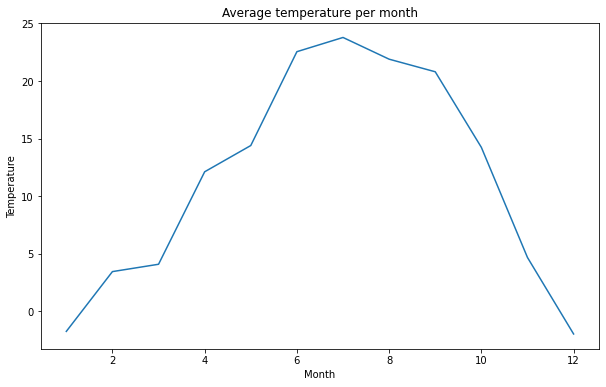

In [36]:
temp_month_mean = chi_weather_2017.groupby("Month")["mean_temp"].mean()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(temp_month_mean)
ax.set_xlabel('Month')
ax.set_ylabel('Temperature')
ax.set_title("Average temperature per month")

plt.show()

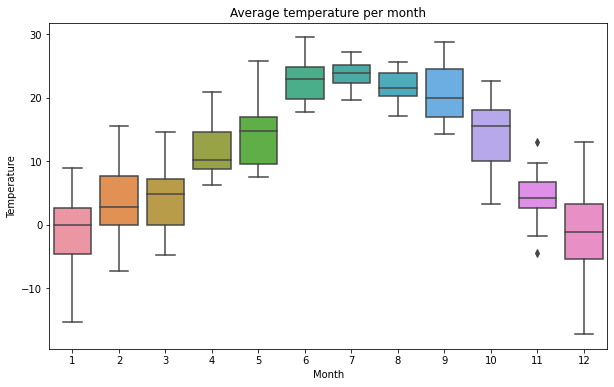

In [37]:
temp_month_mean_bp = chi_weather_2017.groupby(['Date','Month'])['mean_temp'].mean()
temp_month_mean_bp = pd.DataFrame(temp_month_mean_bp)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = temp_month_mean_bp.index.get_level_values('Month'), y =temp_month_mean_bp['mean_temp'], ax = ax)

ax.set_title('Average temperature per month')
ax.set_ylabel("Temperature")
ax.set_xlabel("Month")
plt.show()

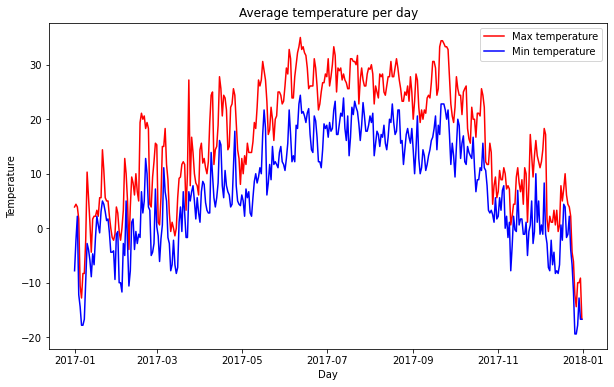

In [38]:
temp_day_min = chi_weather_2017.groupby("Date")["mean_temp"].min()

temp_day_max = chi_weather_2017.groupby("Date")["mean_temp"].max()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(temp_day_max, c = "red", label = "Max temperature")
ax.plot(temp_day_min, c = "blue", label = "Min temperature")
plt.legend()
ax.set_title('Average temperature per day')
ax.set_ylabel("Temperature")
ax.set_xlabel('Day')

plt.show()

#### Temperature weekly

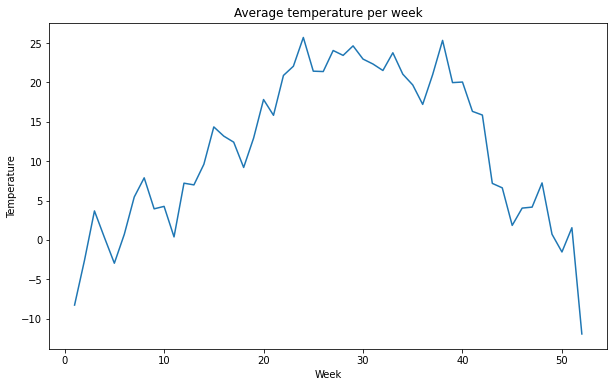

In [39]:
temp_week_mean = chi_weather_2017.groupby("Week")["mean_temp"].mean()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(temp_week_mean)
ax.set_ylabel("Temperature")
ax.set_xlabel('Week')
ax.set_title('Average temperature per week')
plt.show()

#### Temperature daily

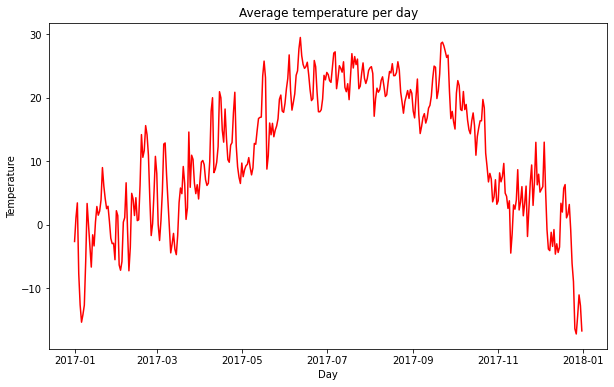

In [40]:
temp_day_mean = chi_weather_2017.groupby("Date")["mean_temp"].mean()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(temp_day_mean, c = "red")
ax.set_title('Average temperature per day')
ax.set_ylabel("Temperature")
ax.set_xlabel('Day')

plt.show()

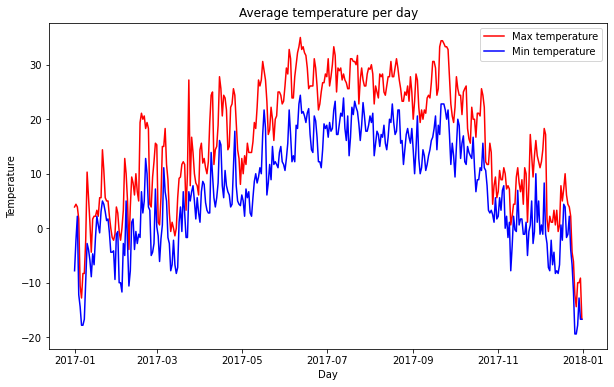

In [41]:
temp_day_min = chi_weather_2017.groupby("Date")["mean_temp"].min()

temp_day_max = chi_weather_2017.groupby("Date")["mean_temp"].max()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(temp_day_max, c = "red", label = "Max temperature")
ax.plot(temp_day_min, c = "blue", label = "Min temperature")
plt.legend()
ax.set_title('Average temperature per day')
ax.set_ylabel("Temperature")
ax.set_xlabel('Day')

plt.show()

#### Precip monthly

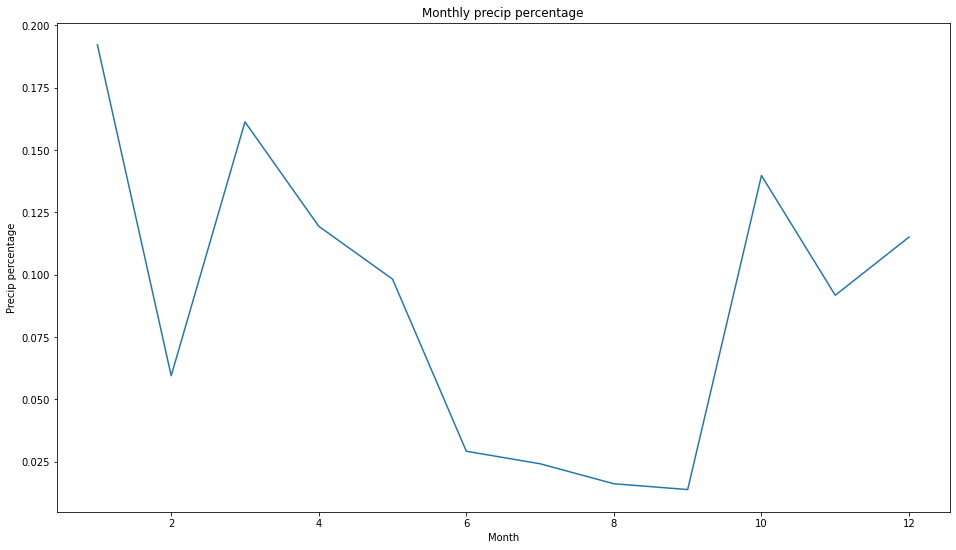

In [42]:
precip_month_mean = chi_weather_2017.groupby("Month")["precip"].mean()

fig, ax = plt.subplots(figsize = (16,9))

ax.plot(precip_month_mean)
ax.set_xlabel('Month')
ax.set_ylabel('Precip percentage')
ax.set_title("Monthly precip percentage")

plt.show()

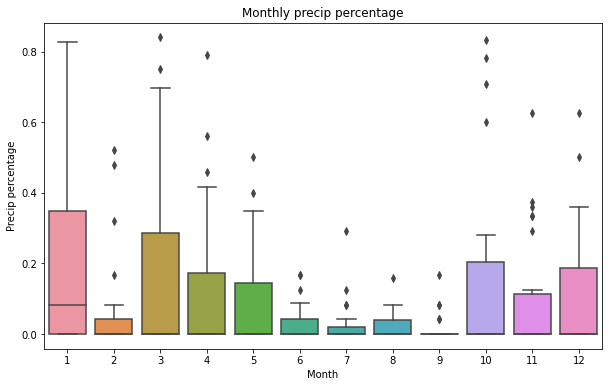

In [43]:
precip_month_mean_bp = chi_weather_2017.groupby(['Date','Month'])['precip'].mean()
precip_month_mean_bp = pd.DataFrame(precip_month_mean_bp)

fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(x = precip_month_mean_bp.index.get_level_values('Month'), y =precip_month_mean_bp['precip'], ax = ax)

ax.set_xlabel('Month')
ax.set_ylabel('Precip percentage')
ax.set_title("Monthly precip percentage")
plt.show()

#### Precip weekly

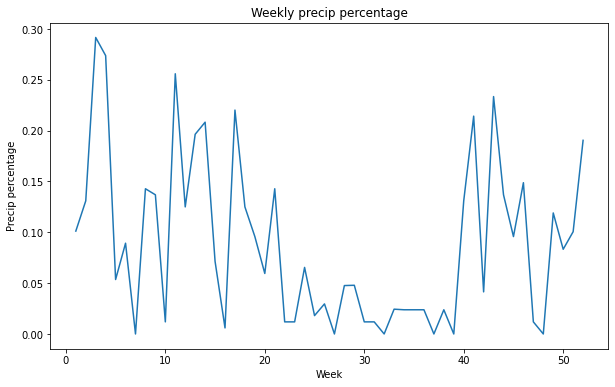

In [44]:
precip_week_mean = chi_weather_2017.groupby("Week")["precip"].mean()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(precip_week_mean)
ax.set_title('Weekly precip percentage')
ax.set_ylabel("Precip percentage")
ax.set_xlabel('Week')
plt.show()

#### Precip daily

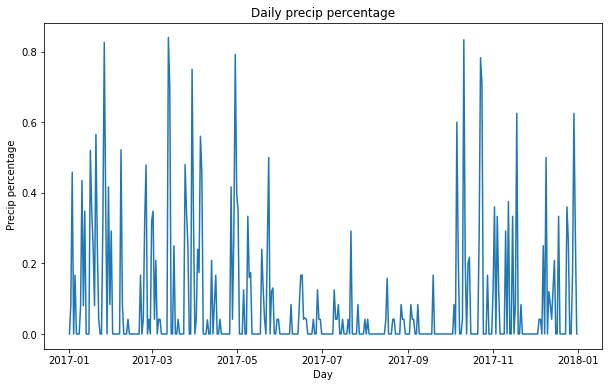

In [45]:
precip_day_mean = chi_weather_2017.groupby("Date")["precip"].mean()

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(precip_day_mean)
ax.set_title('Daily precip percentage')
ax.set_ylabel(" Precip percentage")
ax.set_xlabel('Day')
plt.show()

### Correlation between rentals and weather 

#### Rescaling

In [46]:
rentals_day_resc = (rentals_day-rentals_day.min())/(rentals_day.max()-rentals_day.min())

rentals_week_resc = ((rentals_week-rentals_week.min())/(rentals_week.max()-rentals_week.min()))

rentals_month_resc = ((rentals_month-rentals_month.min())/(rentals_month.max()-rentals_month.min()))

precip_day_resc = (precip_day_mean-precip_day_mean.min())/(precip_day_mean.max()-precip_day_mean.min())

precip_week_resc = (precip_week_mean-precip_week_mean.min())/(precip_week_mean.max()-precip_week_mean.min())

precip_month_resc = (precip_month_mean-precip_month_mean.min())/(precip_month_mean.max()-precip_month_mean.min())

temp_day_resc = (temp_day_mean-temp_day_mean.min())/(temp_day_mean.max()-temp_day_mean.min())

temp_week_resc = (temp_week_mean-temp_week_mean.min())/(temp_week_mean.max()-temp_week_mean.min())

temp_month_resc = ((temp_month_mean-temp_month_mean.min())/(temp_month_mean.max()-temp_month_mean.min()))

#### Rentals and temperatur

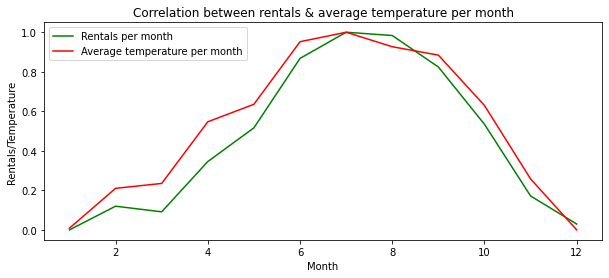

In [47]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(rentals_month_resc, c = 'green', label='Rentals per month')
ax.plot(temp_month_resc, c = 'red', label='Average temperature per month')

ax.set_title('Correlation between rentals & average temperature per month')
ax.set_xlabel('Month')
ax.set_ylabel('Rentals/Temperature')
ax.legend()

plt.show()

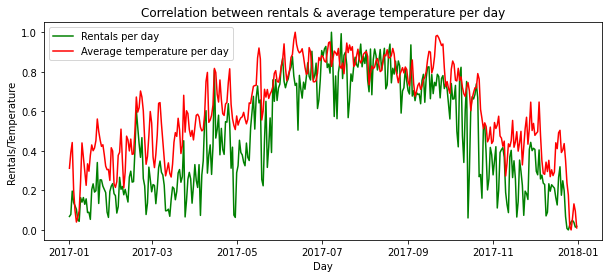

In [48]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(rentals_day_resc, c = 'green', label='Rentals per day')
ax.plot(temp_day_resc, c = 'red', label='Average temperature per day')

ax.set_title('Correlation between rentals & average temperature per day')
ax.set_xlabel('Day')
ax.set_ylabel('Rentals/Temperature')
ax.legend()

plt.show()

In [49]:
#Put weather & rental data into the same data frame
temp_rentals_day = chi_weather_2017.groupby(["Date"])["mean_temp"].mean()
temp_rentals_day = pd.DataFrame(temp_rentals_day)
temp_rentals_day ["Rentals"] = chi_data.groupby(['Date'])['bike_id'].count()
temp_rentals_day ["IsWeekday"] = chi_data.groupby(['Date'])['IsWeekday'].max()

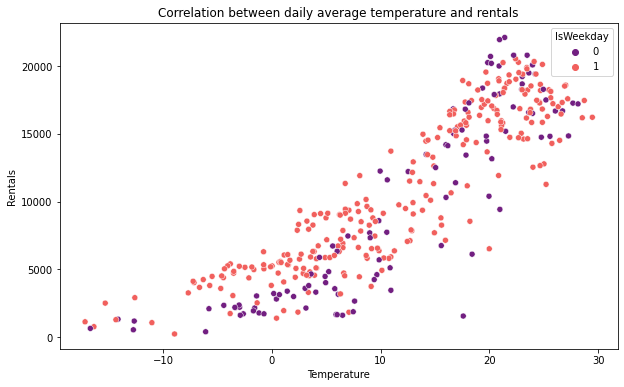

In [50]:

fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(x = temp_rentals_day["mean_temp"], y= temp_rentals_day["Rentals"], hue = temp_rentals_day["IsWeekday"],palette="magma" )
ax.set_title("Correlation between daily average temperature and rentals")
ax.set_xlabel("Temperature")
plt.show()

In [51]:
#Put weather & rental data into the same data frame
precip_rentals_day = chi_weather_2017.groupby(["Date"])["precip"].mean()
precip_rentals_day = pd.DataFrame(precip_rentals_day)
precip_rentals_day ["Rentals"] = chi_data.groupby(['Date'])['bike_id'].count()
precip_rentals_day ["IsWeekday"] = chi_data.groupby(['Date'])['IsWeekday'].max()

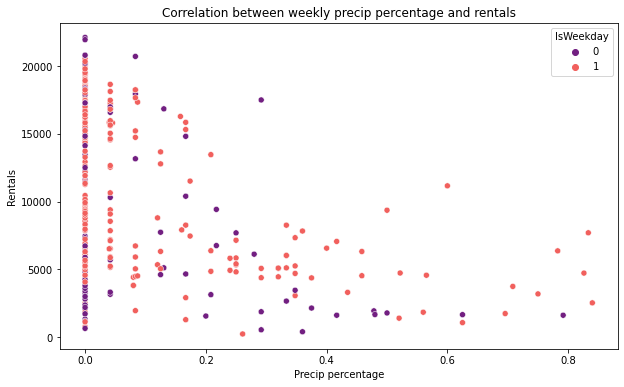

In [52]:

fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(x = precip_rentals_day["precip"], y= precip_rentals_day["Rentals"], hue = precip_rentals_day["IsWeekday"],palette="magma" )
ax.set_title("Correlation between weekly precip percentage and rentals")
ax.set_xlabel("Precip percentage")
plt.show()

#### Rentals and precip

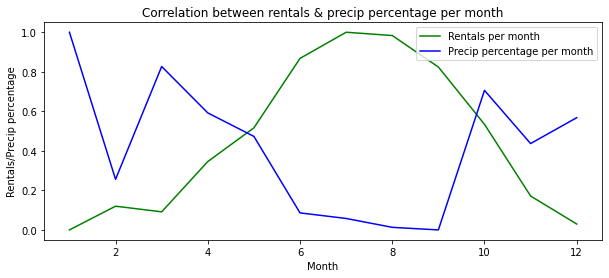

In [53]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(rentals_month_resc, c = 'green', label='Rentals per month')
ax.plot(precip_month_resc, c = 'blue', label='Precip percentage per month')

ax.set_title('Correlation between rentals & precip percentage per month')
ax.set_xlabel('Month')
ax.set_ylabel('Rentals/Precip percentage')
ax.legend()

plt.show()

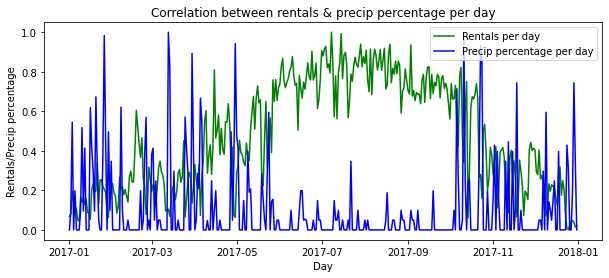

In [54]:
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(rentals_day_resc, c = 'green', label='Rentals per day')
ax.plot(precip_day_resc, c = 'blue', label='Precip percentage per day')

ax.set_title('Correlation between rentals & precip percentage per day')
ax.set_xlabel('Day')
ax.set_ylabel('Rentals/Precip percentage')
ax.legend()

plt.show()

## Geographical demand patterns (Emilio & Alex)

## KPIs

### Total bike usage

KeyError: "Level ['Date', 'Hour'] not found"

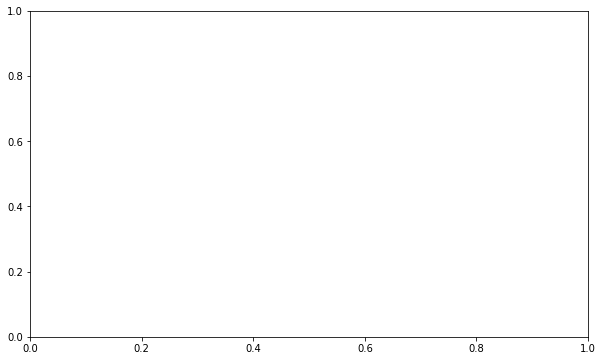

In [73]:
rentals_hour3 = chi_data.groupby(["Date","Hour"])['bike_id'].count()
rentals_hour3 =pd.DataFrame(rentals_hour3)

fig, ax = plt.subplots(figsize = (10,6))


sns.lineplot(x = rentals_hour3.index.get_level_values(["Date", "Hour"]), y =rentals_hour3['bike_id'], ax = ax)
ax.set_title('Bike rentals per hour')
ax.set_ylabel("Bike rentals")
plt.show()
rentals_hour

### Fleet utilization